# Step1) 논문 데이터 준비

riss 크롤링

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import matplotlib.pyplot as plt

In [ ]:
# 논문 키워드와 편수를 입력하면 soup객체를 return하는 함수 정의
def get_soup(keyword, num=100):

    HEADERS= {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}

    url = f'http://www.riss.kr/search/Search.do?isDetailSearch=N&searchGubun=true&viewYn=OP&query={keyword}\
&queryText=&iStartCount=0&iGroupView=5&icate=all&colName=re_a_kor&exQuery=&exQueryText=&order=%2FDESC&onHanja=false&strSort=RANK&pageScale={num}\
&orderBy=&fsearchMethod=search&isFDetailSearch=N&sflag=1&searchQuery={keyword}&\
fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&resultKeyword={keyword}\
&pageNumber=1&p_year1=&p_year2=&dorg_storage=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&language_code=&ccl_code=&language=&inside_outside=&fric_yn=&image_yn=&regnm=&gubun=&kdc=&ttsUseYn='

    result = requests.get(url, headers=HEADERS)

    if result.status_code == 200:
        print("OK")
        soup = bs(result.content, 'html.parser') #result.text

    return soup

In [ ]:
# 함수 호출
soup = get_soup('인공지능 교육', 500)

OK


In [ ]:
# soup를 넣으면 판다스 df를 return하는 함수 정의
def get_riss_df(soup):

    contents = soup.find_all('div', class_= 'cont ml60')

    title = []
    writer =[]
    publisher = []
    year = []
    journal = []
    link = []
    abstracts = []

    for cont in contents :
        title.append(cont.find('p', class_='title').text)
        writer.append(cont.find('span', class_='writer').text)
        publisher.append(cont.find('span', class_='assigned').text)
        year.append(cont.find('p', class_='etc').find_all('span')[2].text)
        journal.append(cont.find('p', class_='etc').find_all('span')[3].text)
        link.append('https://www.riss.kr' + cont.find('p', class_='title').find('a')['href'])
        # abstracts.append(cont.find('p', class_='preAbstract').text)

        if cont.find('p', class_='preAbstract'):
            abstracts.append(cont.find('p', class_='preAbstract').text)
        else :
            abstracts.append('초록이 없습니다.')

    df = pd.DataFrame(
        {'title' : title,
        'writer' : writer,
        'publisher' : publisher,
        'year' : year,
        'journal': journal,
        'link' : link,
        'abstracts': abstracts}
    )

    return df

In [ ]:
# 함수 호출 -> df 확인

df = get_riss_df(soup)
df

,title,writer,publisher,year,journal,link,abstracts
0,챗봇 기반 인공지능 교육 프로그램 개발과 적용,한민영,한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 학생들의 인공지능 기술에 대한 태도 신장을 위한 컴퓨팅 사고력 기반 인공...
1,한국 인공지능 교육의 방향,류미영,한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
2,인공지능의 계층별 교육 내용과 방법,"김태령,한선관",한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 인공지능이 실제 구현되기까지의 시스템을 구조화하고 이에 기반하여 총 6단...
3,인공지능교육 관련 연구 동향 분석 : 키워드 네트워크 분석,"한지윤,신영준",한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 키워드 네트워크 분석을 이용하여 인공 지능 교육의 연구 동향을 조사하는 ...
4,대학 교양교육에서의 국내외 인공지능 교육 현황,"김성애,박주연",한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
...,...,...,...,...,...,...,...
495,인공지능 리터러시 신장을 위한 인공지능 사고 기반 교육 프로그램 개발 및 효과,"이주영(Jooyoung Lee),원용호(Yongho Won),신윤희(Yoonhee ...",한국공학교육학회,2023,공학교육연구,https://www.riss.kr/search/detail/DetailView.d...,The purpose of this study is to develop the Ar...
496,프로그래밍 교육을 위한 생성형 인공지능 활용 가능성 탐색 : ChatGPT를 중심으로,김슬기(Seul Ki Kim),한국컴퓨터교육학회,2023,한국컴퓨터교육학회 학술발표대회논문집,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 생성형 AI 중 하나인 ChatGPT의 프로그래밍 교육에 활용하기 위한 ...
497,인공지능(AI)의 교육적 실천을 위한 가능성과 과제,"성은모 ( Eunmo Sung ),김동호 ( Dongho Kim ),신서경 ( Su...",한국교육공학회,2023,교육공학연구,https://www.riss.kr/search/detail/DetailView.d...,The recent emergence of artificial intelligenc...
498,인공지능과 빅데이터를 활용한 한국어교육 전망 - 영어교육과의 비교를 중심으로,안지현,부산외국어대학교 다문화연구소,2021,다문화사회와 교육연구,https://www.riss.kr/search/detail/DetailView.d...,The purpose of this study is to investigate th...


In [ ]:
# csv 파일로 저장
df.to_csv('riss.csv', index=False)

# Step2) 데이터 분석

- 기본 정보 확인 df.info()
- 결측치 확인 후 제거
- 중복 논문 제거
- 최신 논문만 가져오기(예. 2021년 발행 논문)
- 특정 키워드 포함 논문 가져오기(ex. 제목에 "초딩"이 들어 있는 논문)

In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      500 non-null    object
 1   writer     500 non-null    object
 2   publisher  500 non-null    object
 3   year       500 non-null    object
 4   journal    500 non-null    object
 5   link       500 non-null    object
 6   abstracts  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [ ]:
#빈 값이 있는 데이터 다시 확인
df.isnull().sum()

title        0
writer       0
publisher    0
year         0
journal      0
link         0
abstracts    0
dtype: int64

In [ ]:
# drop_duplicates() : 제목이 같으면 첫 번째 값만 남기고 중복 제거하기 (인덱스는 재설정하기)
df.drop_duplicates(subset=['title'], keep='first', ignore_index=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      483 non-null    object
 1   writer     483 non-null    object
 2   publisher  483 non-null    object
 3   year       483 non-null    object
 4   journal    483 non-null    object
 5   link       483 non-null    object
 6   abstracts  483 non-null    object
dtypes: object(7)
memory usage: 26.5+ KB


In [ ]:
df.shape

(483, 7)

In [ ]:
# 발행연도가 2023년인 논문만 가져오기
df[df['year'] == '2023']

,title,writer,publisher,year,journal,link,abstracts
15,중국의 인공지능(AI) 교육 현황 및 주요 정책분석,이수진,한국인공지능교육학회,2023,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,"본 연구는 중국의 인공지능 교육 현황 및 관련 정책을 살펴보고, 이로부터 우리의 인..."
16,중학교 교사의 인공지능 활용 교육에 대한 인식조사,"이항구,이철현",한국인공지능교육학회,2023,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,이 연구는 중학교에서 인공지능 교육을 활성화하기 위하여 중학교 교사의 인공지능 활용...
18,AI 융합교육이 학습자의 인공지능 가치 인식에 미치는 영향 – 방송미디어 분야 특성...,"박정범,정대홍",한국인공지능교육학회,2023,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 인공지능 융합 교육이 학습자의 인공지능 가치 인식에 어떤 영향을 미치는지...
21,2015 개정 교육과정 <인공지능 수학> 교과서의 공학적 도구 활용 분석,"윤주연,김경진",한국인공지능교육학회,2023,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 2015 개정 교육과정 <인공지능 수학> 교과서에서 활용된 공학적 도구에...
30,의과대학에서 의료 인공지능 교육 경험과 이에 대한 만족도 조사,"김라은,송민선,박하경,신지원,김헌성",한국인공지능교육학회,2023,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,당해 연구는 가톨릭대학교 의과대학에서 운영되고 있는 의료 인공지능 교육과정 수강 학...
...,...,...,...,...,...,...,...
474,인공지능 기반 맞춤형 교육서비스에 대한 학교교육 이해관계자의 인식 및 요구 분석,"진성희 ( Sung-hee Jin ),유미나 ( Mina Yoo ),서경원 ( Ky...",한국교육공학회,2023,교육공학연구,https://www.riss.kr/search/detail/DetailView.d...,Generative AI technology holds transformative ...
475,인공지능(AI)의 교육적 실천을 위한 가능성과 과제,"성은모,김동호,신서경,이영주",한국교육공학회,2023,교육공학연구,https://www.riss.kr/search/detail/DetailView.d...,The recent emergence of artificial intelligenc...
476,인공지능 융합 TPACK 교육 프로그램을 통한 예비 교사의 수업 전문성 변화,"김성원(Seong-Won Kim),이은경(Eunkyoung Lee)",한국컴퓨터교육학회,2023,한국컴퓨터교육학회 학술발표대회논문집,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
479,인공지능 리터러시 신장을 위한 인공지능 사고 기반 교육 프로그램 개발 및 효과,"이주영(Jooyoung Lee),원용호(Yongho Won),신윤희(Yoonhee ...",한국공학교육학회,2023,공학교육연구,https://www.riss.kr/search/detail/DetailView.d...,The purpose of this study is to develop the Ar...


In [ ]:
# year 칼럼의 데이터를 int로 변환
df.year.astype('int32')

ValueError: invalid literal for int() with base 10: '한국외국어교육학회'

In [ ]:
# 오류 메시지 확인 : 한국외국어교육학회

df[df.year.str.contains('한국외국어교육학회')]

,title,writer,publisher,year,journal,link,abstracts
386,인공지능과 외국어 교육,한국외국어교육학회,한국외국어교육학회,한국외국어교육학회,2017,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.


In [ ]:
# 해당 데이터 삭제
df.drop(index=386, inplace=True)

In [ ]:
df[381:386]

,title,writer,publisher,year,journal,link,abstracts
381,인공지능 교육에 활용되는 자율주행차 교구,"이원태(Wontae Lee),소원호(Wonho So)",한국컴퓨터교육학회,2023,한국컴퓨터교육학회 학술발표대회논문집,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
382,사회과에서 미래연구의 재구성과 인공지능 사회인식교육의 문제설정,"남호엽,조현기",한국사회교과교육학회,2020,한국사회교과교육학회 학술대회지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
383,초·중등 인공지능 교육을 위한 교육용 데이터셋 기준 연구,"김슬기(Seulki Kim),김태영(Taeyoung Kim)",한국컴퓨터교육학회,2022,컴퓨터교육학회 논문지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
384,도덕과교육 인공지능 플랫폼 개발 방안,김봉제,한국초등도덕교육학회,2020,한국초등도덕교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
385,노벨 엔지니어링을 활용한 초등학교 고학년 대상 인공지능 윤리교육 프로그램 개발,"최선유,김귀훈",학습자중심교과교육학회,2023,학습자중심교과교육연구,https://www.riss.kr/search/detail/DetailView.d...,"Objectives In this study, an artificial intell..."


In [ ]:
# year 칼럼의 데이터를 다시 int로 변환
df.year=df.year.astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      482 non-null    object
 1   writer     482 non-null    object
 2   publisher  482 non-null    object
 3   year       482 non-null    int32 
 4   journal    482 non-null    object
 5   link       482 non-null    object
 6   abstracts  482 non-null    object
dtypes: int32(1), object(6)
memory usage: 28.2+ KB


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
# 제목에 "초등"이란 키워드가 들어있는 논문만 가져오기 df[df['칼럼이름'].str.contains('포함단어')]

df[df.title.str.contains('초등')]

,title,writer,publisher,year,journal,link,abstracts
6,2022 개정 교육과정 분석을 통한 초등학교 인공지능윤리 교육 프로그램 개발,문상필,한국인공지능교육학회,2022,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
8,초등학생의 인공지능 윤리 함양을 위한 인공지능 교육 프로그램 개발,황인찬,한국인공지능교육학회,2022,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
14,초등학생의 인공지능 윤리 함양을 위한 교육프로그램 개발 및 적용,송유호,한국인공지능교육학회,2022,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
23,초등학생 인공지능윤리교육을 위한 STEAM 프로그램 개발,"김지언,이철현",한국인공지능교육학회,2021,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
25,인공지능교육에 대한 초등교사의 인식 조사,"고병철,한선관",한국인공지능교육학회,2021,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
...,...,...,...,...,...,...,...
443,인공지능을 활용한 교과융합 환경교육 프로그램이 초등학생의 환경소양과 인공지능역량에...,"김중균,김경언",서울교육대학교 초등교육연구원,2023,한국초등교육,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 초등학생을 대상으로 인공지능을 활용한 환경 융합 프로그램을 설계⋅개발하고...
444,생성형 인공지능을 활용한 초등 진로교육 프로그램 개발 기초연구,김재호(Jaeho Kim),한국실과교육학회,2023,한국실과교육학회지,https://www.riss.kr/search/detail/DetailView.d...,This study aimed to establish a basic needs an...
458,인공지능 사회에서 초등학교 무용교육의 교육적 의미 탐색,오세복,한국문화교육학회,2019,문화예술교육연구,https://www.riss.kr/search/detail/DetailView.d...,This study aims to explore the educational mea...
461,초등학생의 생태적 감수성 향상을 위한 인공지능 기반 해양 생태전환교육 프로그램 개발,"김민선,신동훈",한국초등과학교육학회,2024,초등과학교육,https://www.riss.kr/search/detail/DetailView.d...,이 연구의 목적은 초등학생의 생태적 감수성 향상을 위한 인공지능 기반 해양 생태전환...


실습예제 - 2020년 이후 논문을 다 가져오기
- 저자 중에 이름이 '홍길동'인 분의 논문만 가져오기

In [ ]:
# 최신 논문 순으로 보기
df[df.year>=2020].sort_values('year', ascending=False)

,title,writer,publisher,year,journal,link,abstracts
152,인공지능 융합 발명교육 프로그램이 발명 태도에 미치는 영향,김다솔(Dasol Kim),서원대학교 사범대학 부설 교육연구소,2024,교육발전,https://www.riss.kr/search/detail/DetailView.d...,이 연구의 목적은 중학교에 재학 중인 학생들을 대상으로 인공지능 융합 발명교육 프로...
328,초등학생의 인공지능 태도와 진로 탐색 역량 함양을 위한 프로젝트 기반 인공지능 진로...,"윤호경,김영식",한국정보교육학회,2024,정보교육학회논문지,https://www.riss.kr/search/detail/DetailView.d...,It is expected that the future job environment...
126,특성화고 인공지능학과 개편에 따른 인공지능 교육과정 개편 방안 연구,구은희,한국실천공학교육학회,2024,실천공학교육논문지,https://www.riss.kr/search/detail/DetailView.d...,세계적으로 인공지능의 발전으로 삶이 크게 변하고 있다. 교육 분야에서는 AI를 적극...
268,지식정보처리 및 창의적 사고 역량 함양을 위한 공공데이터 시각화 기반 인공지능 교육...,"김광호,송영재,유현석",학습자중심교과교육학회,2024,학습자중심교과교육연구,https://www.riss.kr/search/detail/DetailView.d...,Objectives The purposes of this study are to d...
408,청년 취업준비생 대상 인공지능 교육: 플립러닝의 효과성 검증,"김효진,소효정,서영주",한국정보교육학회,2024,정보교육학회논문지,https://www.riss.kr/search/detail/DetailView.d...,As the importance of artificial intelligence (...
...,...,...,...,...,...,...,...
384,도덕과교육 인공지능 플랫폼 개발 방안,김봉제,한국초등도덕교육학회,2020,한국초등도덕교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
382,사회과에서 미래연구의 재구성과 인공지능 사회인식교육의 문제설정,"남호엽,조현기",한국사회교과교육학회,2020,한국사회교과교육학회 학술대회지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
194,"인공지능의 시대, 교육의 변화와 방향에 따른 학교체육의 과제","박민영 ( Park Min Young ),엄우섭 ( Eom Woo Seop )",서울교육대학교 초등교육연구원,2020,한국초등교육,https://www.riss.kr/search/detail/DetailView.d...,본 연구의 목적은 인공지능 시대에 교육이 맞이하게 될 변화와 앞으로 나아갈 방향을 ...
207,AI의 5가지 빅 아이디어에 따른 해외 인공지능 교육과정 분석,"장연주(Yeonju Jang),김성훈(Seonghun Kim),최승윤(Seongyu...",한국컴퓨터교육학회,2020,한국컴퓨터교육학회 학술발표대회논문집,https://www.riss.kr/search/detail/DetailView.d...,전 세계적으로 인공지능 교육의 필요성이 부상하고 있다. 세계 각국에서는 인공지능 교...


In [ ]:
df[df.writer.str.contains('한선관')]

,title,writer,publisher,year,journal,link,abstracts
2,인공지능의 계층별 교육 내용과 방법,"김태령,한선관",한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 인공지능이 실제 구현되기까지의 시스템을 구조화하고 이에 기반하여 총 6단...
19,초중등 인공지능 교육을 위한 프레임워크 기초 연구,"김태령,류미영,한선관",한국인공지능교육학회,2020,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
22,인공지능교육 플랫폼의 초중등 수업 적합성 연구,"김태령,한선관",한국인공지능교육학회,2022,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
25,인공지능교육에 대한 초등교사의 인식 조사,"고병철,한선관",한국인공지능교육학회,2021,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
26,인공지능을 활용한 예술융합교육이 초등학생 창의성에 미치는 효과,"양다예,한선관",한국인공지능교육학회,2021,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
28,인공지능 교육 프로그램 개발 및 적용을 통한 인공지능 역량·태도·인식 변화 분석,"이동열,한선관",한국인공지능교육학회,2022,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
36,인공지능교육을 위한 언플러그드 프로그램 개발 : 제약만족문제를 중심으로,"장명현,한선관",한국인공지능교육학회,2020,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,초록이 없습니다.
58,가치 중심 인공지능 교재 개발 연구,"홍수빈,한선관",한국인공지능교육학회,2023,인공지능연구 논문지,https://www.riss.kr/search/detail/DetailView.d...,이 연구에서는 초중고 학생들을 위한 가치 중심 인공지능 교육 교재를 개발하는데 목표...
63,인공지능교육에 관한 초중등교사의 인식에 관한 연구,"김태령(Kim, Tae-Ryeong),한선관(Han, Sun-Gwan)",경인교육대학교 교육연구원,2020,교육논총,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 최근 이슈가 되고 있는 인공지능 교육에 대한 초중등 교사의 인식에 관한 ...
83,선행조직자를 활용한 인공지능교육 프로그램의 개발과 적용,"한선관(Han, Sun-Gwan)",경인교육대학교 교육연구원,2021,교육논총,https://www.riss.kr/search/detail/DetailView.d...,이 연구는 초보자에게 인공지능의 개념과 알고리즘을 쉽게 가르치기 위한 교육 프로그램...


- 심화문제 : 초록에 '로봇'이란 단어 포함된 2020년 이후 발행된 논문을 가져와보세요.

df[(조건)&(조건)]

In [ ]:
df[(df.abstracts.str.contains('로봇')) & (df.year>=2020)]

,title,writer,publisher,year,journal,link,abstracts
80,드론 활용 인공지능교육 프로그램이 초등학생의 창의적 문제해결력에 미치는 영향,"윤경환,문성환",서울교육대학교 초등교육연구원,2023,한국초등교육,https://www.riss.kr/search/detail/DetailView.d...,이 연구는 초등학교 6학년 학생을 대상으로 드론을 활용해 지역 문제를 해결해보는 인...
124,로봇 활용 인공지능 교육 프로그램이 초등학생의 인공지능 기술에 대한 태도에 미치는 영향,"정한별,문성환",대구교육대학교 초등교육연구소,2023,초등교육연구논총,https://www.riss.kr/search/detail/DetailView.d...,This study was conducted to verify the effect ...
128,수학교육에서 인공지능의 활용 동향,박만구 ( Park Mangoo ),서울교육대학교 초등교육연구원,2020,한국초등교육,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 수학교육에서 인공지능을 활용 선도 국가들의 간략한 사례와 국내 적용의 구...
135,노벨엔지니어링을 활용한 초등학생 대상의 인공지능 교육프로그램,"김주현 ( Kim Juhyun ),문성환 ( Moon Seonghwan )",서울교육대학교 초등교육연구원,2021,한국초등교육,https://www.riss.kr/search/detail/DetailView.d...,이 연구는 스토리텔링 기반의 독서와 공학을 융합한 노벨엔지니어링 교수법을 적용해 초...
156,초등 실과교육에서 인공지능 관련 국내 연구 동향,장현진 ( Jang Hyun Jin ),서울교육대학교 초등교육연구원,2020,한국초등교육,https://www.riss.kr/search/detail/DetailView.d...,이 연구의 목적은 초등 실과교육에서 인공지능과 관련한 국내의 연구 동향을 분석하는 ...
159,키워드 네트워크 분석을 통한 인공지능인문학 연구의 영향성 분석,"최지현,황서이,이유미",중앙대학교 인문콘텐츠연구소,2023,인공지능인문학연구,https://www.riss.kr/search/detail/DetailView.d...,The purpose of this study is to identify resea...
168,인공지능 윤리교육의 초등도덕 교육과정 적용 방안,홍현주 ( Hong Hyun-ju ),한국초등도덕교육학회,2021,초등도덕교육,https://www.riss.kr/search/detail/DetailView.d...,4차 산업혁명 속 AI와 로봇 기술은 우리의 일상 속에 깊숙이 다가오고 있다. 하지...
194,"인공지능의 시대, 교육의 변화와 방향에 따른 학교체육의 과제","박민영 ( Park Min Young ),엄우섭 ( Eom Woo Seop )",서울교육대학교 초등교육연구원,2020,한국초등교육,https://www.riss.kr/search/detail/DetailView.d...,본 연구의 목적은 인공지능 시대에 교육이 맞이하게 될 변화와 앞으로 나아갈 방향을 ...
199,영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능...,김동조 ( Dong-jo Kim ),중앙대학교 인문콘텐츠연구소,2022,인공지능인문학연구,https://www.riss.kr/search/detail/DetailView.d...,인공지능 영화는 대체로 이분화되는 시나리오 특징이 있으며 ‘신체가 있는 인공지능’과...
245,로봇 활용 인공지능 교육 프로그램 개발과 적용에 관한 연구,"유인환,배영권,박대륜,안중민,김우열",한국정보교육학회,2020,정보교육학회논문지,https://www.riss.kr/search/detail/DetailView.d...,초등학교 소프트웨어 교육에서는 간단한 문제해결 과정을 통하여 프로그래밍 과정을 경험...


# step3. 데이터 시각화
- 연도별 논문 수
- 발행기관별 논문 수

In [ ]:
# 한글 지원 라이브러리 설치
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.7 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:
# 연도별 발행논문 수
df.year.value_counts()

2023    134
2022    108
2021    107
2020     80
2024     17
2019     14
2018     10
2017      7
2016      3
2014      1
1993      1
Name: year, dtype: int64

<Axes: ylabel='Frequency'>

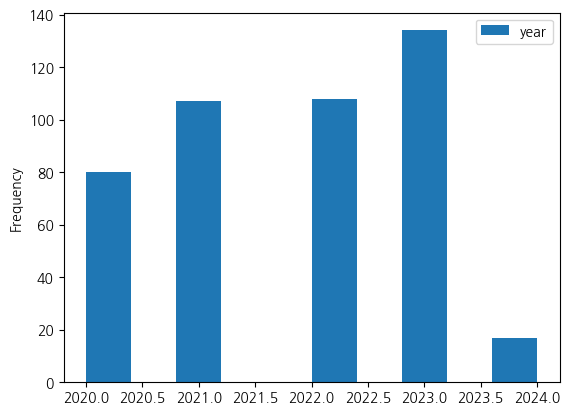

In [ ]:
# 연도별 논문편수 시각화
df[df.year>=2020].plot(kind='hist')

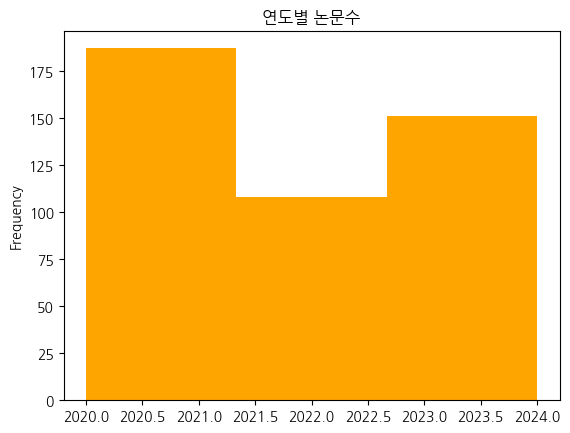

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df[df.year>=2020].plot(kind='hist', legend='', ylabel='', color='orange', title='연도별 논문수', bins=3)
plt.show()

In [ ]:
# 학회 빈도 확인
df.publisher.value_counts()

한국컴퓨터교육학회          134
한국인공지능교육학회          71
한국정보교육학회            47
한국초등도덕교육학회          20
서울교육대학교 초등교육연구원     14
                  ... 
한국과학교육학회             1
한국영재교육학회             1
한국교육행정학회             1
성신여자대학교 교육문제연구소      1
부산외국어대학교 다문화연구소      1
Name: publisher, Length: 86, dtype: int64

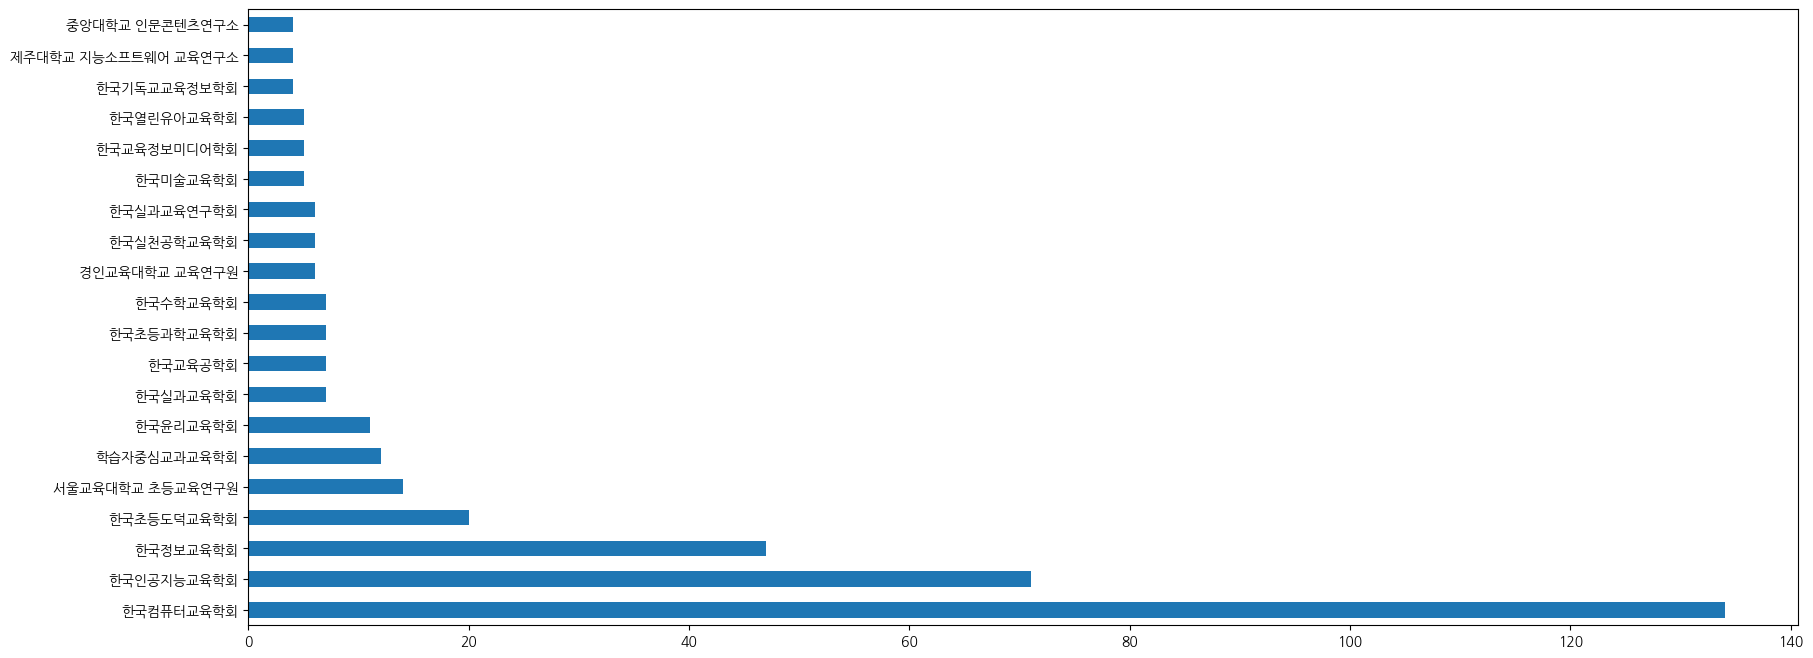

In [ ]:
# 수평 막대그래프 그리기
plt.figure(figsize=(20, 8))
freq = df.publisher.value_counts().head(20)
freq.plot(kind='barh')
plt.show()

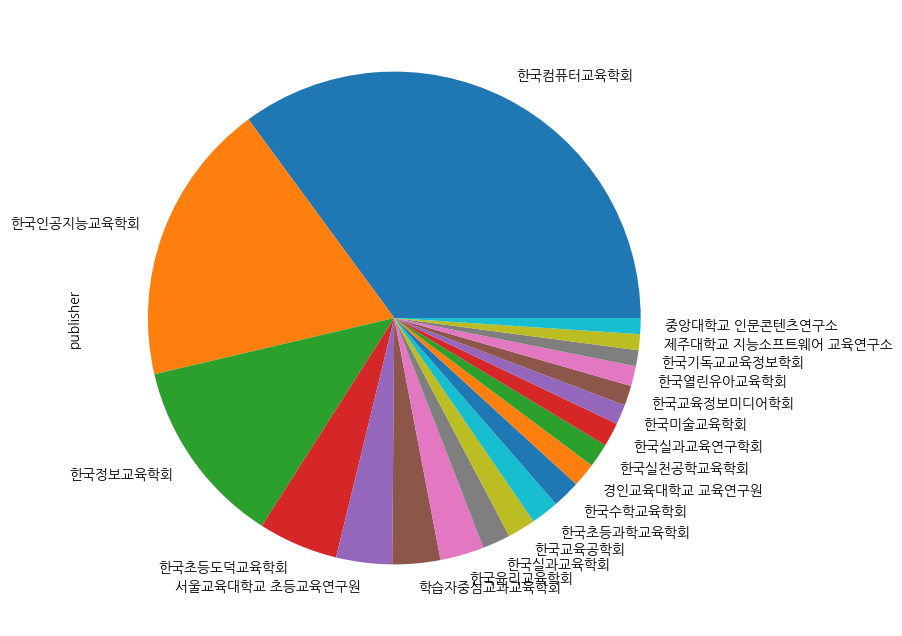

In [ ]:
# 파이차트 그리기
plt.figure(figsize=(8, 8))
freq = df.publisher.value_counts().head(20)
freq.plot(kind='pie')
plt.show()

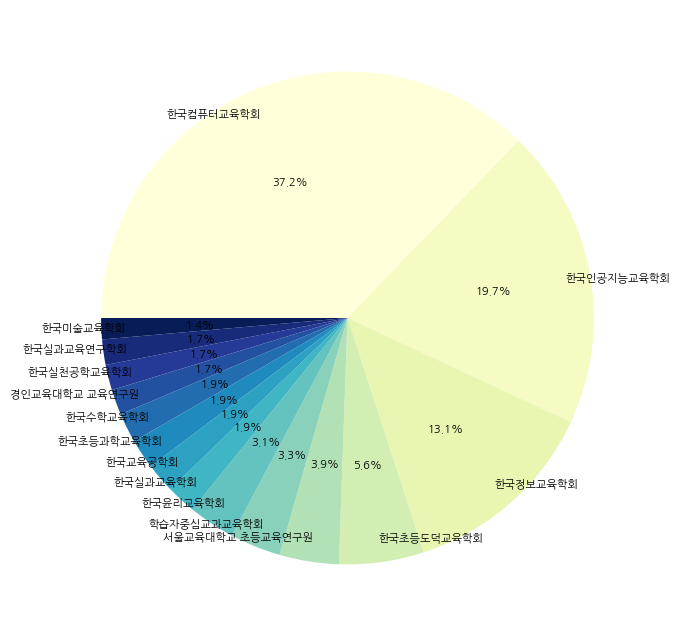

In [ ]:
# 다르게, 좀 더 예쁘게
plt.figure(figsize=(8, 8))
freq = df.publisher.value_counts().head(15)
freq.plot(kind='pie', label='', autopct='%.1f%%', shadow=False, cmap='YlGnBu', counterclock=False, startangle=180, fontsize=8, labeldistance=0.9)
plt.show()

## 정규 표현식으로 텍스트 전처리 하기

- 한글 초록 저장

In [ ]:
# 한글 초록만 따로 저장하기
ko_초록 = df.abstracts.str.replace('[^가-힣]+', ' ', regex=True)
ko_초록[10:40]

10                                            초록이 없습니다 
11                                            초록이 없습니다 
12                                            초록이 없습니다 
13                                            초록이 없습니다 
14                                            초록이 없습니다 
15    본 연구는 중국의 인공지능 교육 현황 및 관련 정책을 살펴보고 이로부터 우리의 인공...
16    이 연구는 중학교에서 인공지능 교육을 활성화하기 위하여 중학교 교사의 인공지능 활용...
17                                            초록이 없습니다 
18    본 연구는 인공지능 융합 교육이 학습자의 인공지능 가치 인식에 어떤 영향을 미치는지...
19                                            초록이 없습니다 
20                                            초록이 없습니다 
21    본 연구는 개정 교육과정 인공지능 수학 교과서에서 활용된 공학적 도구에 관하여 비교...
22                                            초록이 없습니다 
23                                            초록이 없습니다 
24                                            초록이 없습니다 
25                                            초록이 없습니다 
26                                            초록이 없습니다 
27                                            초록

In [ ]:
# 영어 초록만 따로 저장하기
eng_초록 = df.abstracts.str.replace('[^a-zA-Z]+', ' ', regex=True)
eng_초록[10:40]

10                                                     
11                                                     
12                                                     
13                                                     
14                                                     
15     The purpose of this study is to examine the c...
16     This study attempted to make a meaningful pro...
17                                                     
18     This study was conducted to examine the impac...
19                                                     
20                                                     
21     Computational Thinking The purpose of this st...
22                                                     
23                                                     
24                                                     
25                                                     
26                                                     
27                                              

In [ ]:
# 한글 초록 저장
ko_초록.to_csv('한국어초록.csv', index=False)

- 한글 나눔글꼴설치

In [ ]:
# colab에서 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,844 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and dire

- 런타임 다시 시작

In [ ]:
# 제대로 잘 깔렸는지 확인

import matplotlib.font_manager as fm

sys_font = fm.findSystemFonts()

for f in sys_font:
  if 'Nanum' in f:
    print(f)

/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf


## 한글 형태소 분석과 워드클라우드

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 39.5 MB/s eta 0:00:00


In [ ]:
import konlpy

In [ ]:
df_초록 = pd.read_csv('/content/한국어초록.csv')
df_초록.head()

,abstracts
0,본 연구는 학생들의 인공지능 기술에 대한 태도 신장을 위한 컴퓨팅 사고력 기반 인공...
1,초록이 없습니다
2,본 연구는 인공지능이 실제 구현되기까지의 시스템을 구조화하고 이에 기반하여 총 단계...
3,본 연구는 키워드 네트워크 분석을 이용하여 인공 지능 교육의 연구 동향을 조사하는 ...
4,초록이 없습니다


In [ ]:
# abstracts만 리스트로 만들기 .to_list()
text = df_초록.abstracts.to_list()
text[0]

'본 연구는 학생들의 인공지능 기술에 대한 태도 신장을 위한 컴퓨팅 사고력 기반 인공지능 교육 프로 그램을 개발하는 것을 목적으로 한다 인공지능 교육 프로그램의 주제를 선정하기 위해 학생 설문과 학습 요소에 따라 챗봇 을 주제로 선정하였다 관련 문헌과 소프트웨어 교육과정을 분석해 챗봇 기반 인 공지능 교육 프로그램의 개발 기준을 선정한 후 전문가 타당도 분석 결과로 검토를 실시하였다 검토한 개발 기준에 따라 차시의 교육 프로그램을 개발하였으며 학습 적합도 검사는 전문가 타당도 분석 결과 를 실시했으며 개방형 응답에 따라 프로그램을 수정 보완하였다 최종 프로그램의 효과성을 검증하기 위 해 통제집단 사전사후 실험 설계에 따라 연구를 진행하여 인공지능 기술에 대한 태도의 변화를 살펴보았 다 그 결과 인공지능 기술에 대한 전체 태도 인공지능 기술의 성 역할 인공지능 기술의 접근 용이성과 인공지능 기술 관련 진로 영역에서는 유의미한 향상을 보였다 '

In [ ]:
len(text)

440

- 명사만 추출하기

In [ ]:
from konlpy.tag import Okt
okt=Okt()
okt.nouns(text[0])

['연구',
 '학생',
 '인공',
 '지능',
 '기술',
 '대한',
 '태도',
 '신장',
 '위',
 '컴퓨팅',
 '사고력',
 '기반',
 '인공',
 '지능',
 '교육',
 '프로',
 '그램',
 '개발',
 '것',
 '목적',
 '인공',
 '지능',
 '교육',
 '프로그램',
 '주제',
 '선정',
 '위해',
 '학생',
 '설문',
 '학습',
 '요소',
 '챗봇',
 '주제',
 '선정',
 '관련',
 '문헌',
 '소프트웨어',
 '교육과정',
 '분석',
 '챗봇',
 '기반',
 '인',
 '지능',
 '교육',
 '프로그램',
 '개발',
 '기준',
 '선정',
 '후',
 '전문가',
 '타당도',
 '분석',
 '결과',
 '검토',
 '실시',
 '검토',
 '개발',
 '기준',
 '교육',
 '프로그램',
 '개발',
 '학습',
 '적합',
 '검사',
 '전문가',
 '타당도',
 '분석',
 '결과',
 '를',
 '실시',
 '개방',
 '응답',
 '프로그램',
 '수정',
 '보완',
 '최종',
 '프로그램',
 '효과',
 '검증',
 '위',
 '해',
 '통제',
 '집단',
 '사전',
 '사후',
 '실험',
 '설계',
 '연구',
 '진행',
 '인공',
 '지능',
 '기술',
 '대한',
 '태도',
 '변화',
 '그',
 '결과',
 '인공',
 '지능',
 '기술',
 '대한',
 '전체',
 '태도',
 '인공',
 '지능',
 '기술',
 '성',
 '역할',
 '인공',
 '지능',
 '기술',
 '접근',
 '용이',
 '성과',
 '인공',
 '지능',
 '기술',
 '관련',
 '진로',
 '영역',
 '유',
 '의미',
 '향상']

In [ ]:
# 명사 추출
nouns=[]
stop_words = '인공 지능 초록이 없습니다 위해'
stop_words=stop_words.split(' ')
for words in text:
    for noun in okt.nouns(words):
        if noun not in stop_words and len(noun) >=2:
            nouns.append(noun)

print(len(nouns))

29817


In [ ]:
print(nouns[:20])

['연구', '학생', '기술', '대한', '태도', '신장', '컴퓨팅', '사고력', '기반', '교육', '프로', '그램', '개발', '목적', '교육', '프로그램', '주제', '선정', '학생', '설문']


In [ ]:
# list comprehension

nouns_ = [noun for words in text for noun in okt.nouns(words) if noun not in stop_words and len(noun) >=2]
# for words in text:
#     for noun in okt.nouns(words):
#         if noun not in stop_words and len(noun) >=2:
#             nouns.append(noun)

print(len(nouns_))

29817


In [ ]:
print(nouns_[:20])

['연구', '학생', '기술', '대한', '태도', '신장', '컴퓨팅', '사고력', '기반', '교육', '프로', '그램', '개발', '목적', '교육', '프로그램', '주제', '선정', '학생', '설문']


키위형태소 분석기

https://github.com/bab2min/kiwipiepy

참고 : https://zzgrworkspace.tistory.com/97

In [ ]:
!pip install --upgrade pip
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.5 MB/s eta 0:00:00
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.17.0-py3-none-any.whl size=34845033 sha256=34093b405830460810d3e4c9da4151fe79497ab3cf6887f0b125411f12c52992
  Stored in directory: /root/.cache/pip/wheels/90/bb/ae/15e1cf26d17183040bac268fbf8d1ca1f45f7f4daa0fb76b91
Successfully built kiwipiepy-model


In [ ]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
# tokenize 함수로 형태소 분석 결과를 얻을 수 있습니다.
tokenized = kiwi.tokenize("아버지께서 오랜지병으로 돌아가셨습니다. ")

In [ ]:
tokenized[0][0]

'아버지'

In [ ]:
tokenized[0][1]

'NNG'

In [ ]:
from kiwipiepy.utils import Stopwords
stopwords = Stopwords()
noun_list=['NNG', 'NNP', 'NNB', 'NR', 'NP']
nouns_k =[]

stopwords.add(('인공', 'NNG'))
stopwords.add(('지능', 'NNG'))
stopwords.add(('초록', 'NNG'))

In [ ]:
# stopwords 리스트
stopwords.stopwords

{('ᆫ', 'ETM'),
 ('ᆫ', 'JX'),
 ('ᆫ다', 'EF'),
 ('ᆯ', 'ETM'),
 ('가', 'JKS'),
 ('같', 'VA'),
 ('것', 'NNB'),
 ('게', 'EC'),
 ('겠', 'EP'),
 ('고', 'EC'),
 ('고', 'JKQ'),
 ('과', 'JC'),
 ('과', 'JKB'),
 ('그', 'MM'),
 ('그', 'NP'),
 ('기', 'ETN'),
 ('까지', 'JX'),
 ('나', 'NP'),
 ('년', 'NNB'),
 ('는', 'ETM'),
 ('는', 'JX'),
 ('다', 'EC'),
 ('다', 'EF'),
 ('다고', 'EC'),
 ('다는', 'ETM'),
 ('대하', 'VV'),
 ('더', 'MAG'),
 ('던', 'ETM'),
 ('도', 'JX'),
 ('되', 'VV'),
 ('되', 'XSV'),
 ('들', 'XSN'),
 ('등', 'NNB'),
 ('따르', 'VV'),
 ('때', 'NNG'),
 ('때문', 'NNB'),
 ('라', 'EC'),
 ('라는', 'ETM'),
 ('로', 'JKB'),
 ('를', 'JKO'),
 ('만', 'JX'),
 ('만', 'NR'),
 ('말', 'NNG'),
 ('며', 'EC'),
 ('면', 'EC'),
 ('면서', 'EC'),
 ('명', 'NNB'),
 ('받', 'VV'),
 ('보', 'VV'),
 ('부터', 'JX'),
 ('사람', 'NNG'),
 ('성', 'XSN'),
 ('수', 'NNB'),
 ('아니', 'VCN'),
 ('않', 'VX'),
 ('어', 'EC'),
 ('어', 'EF'),
 ('어서', 'EC'),
 ('어야', 'EC'),
 ('없', 'VA'),
 ('었', 'EP'),
 ('에', 'JKB'),
 ('에게', 'JKB'),
 ('에서', 'JKB'),
 ('와', 'JC'),
 ('와', 'JKB'),
 ('우리', 'NP'),
 ('원', 'NNB'),


In [ ]:
for words in text:
    for word in kiwi.tokenize(words, stopwords=stopwords):
        if word[1] in noun_list and len(word[0]) >=2:
            nouns_k.append(word[0])

In [ ]:
print('kiwi', nouns_k[:20])
print('Okt', nouns[:20])

kiwi ['연구', '학생', '기술', '태도', '신장', '컴퓨팅', '사고력', '기반', '교육', '프로', '그램', '개발', '목적', '교육', '프로그램', '주제', '선정', '학생', '설문', '학습']
kkma ['연구', '학생', '기술', '대한', '태도', '신장', '컴퓨팅', '사고력', '기반', '교육', '프로', '그램', '개발', '목적', '교육', '프로그램', '주제', '선정', '학생', '설문']


- 상위 빈도 단어 50개 가져오기

In [ ]:
from collections import Counter

nouns_counter = Counter(nouns)
nouns_counter.most_common(10)

[('교육', 1898),
 ('연구', 864),
 ('활용', 564),
 ('대한', 439),
 ('분석', 374),
 ('개발', 369),
 ('학습', 368),
 ('프로그램', 335),
 ('기술', 297),
 ('결과', 284)]

In [ ]:
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'교육': 1898,
 '연구': 864,
 '활용': 564,
 '대한': 439,
 '분석': 374,
 '개발': 369,
 '학습': 368,
 '프로그램': 335,
 '기술': 297,
 '결과': 284,
 '교사': 278,
 '융합': 258,
 '학생': 256,
 '내용': 223,
 '수업': 212,
 '적용': 210,
 '역량': 198,
 '윤리': 194,
 '관련': 179,
 '통해': 178,
 '기반': 176,
 '교육과정': 172,
 '사회': 171,
 '효과': 170,
 '데이터': 162,
 '대상': 158,
 '목적': 150,
 '초록': 144,
 '변화': 143,
 '방법': 136,
 '인식': 135,
 '영역': 132,
 '교과': 132,
 '교수': 132,
 '과정': 130,
 '제시': 124,
 '이해': 119,
 '학교': 118,
 '관심': 117,
 '문제': 114,
 '인간': 112,
 '시대': 110,
 '구성': 109,
 '초등학교': 109,
 '자료': 106,
 '초등': 104,
 '설계': 103,
 '중심': 103,
 '현장': 103,
 '또한': 103}

- bigram, tf-idf로 분석을 진행하여도 됨.

#### 워드클라우드

https://github.com/amueller/word_cloud

In [ ]:
!pip install wordcloud

워드 크라우드 만들기

1) wordcloud.generate(text)

2) wordcloud.generate_from_frequencies(top_nouns)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image

### Stopwords (불용어) 추가하기

- 불용어란 큰 의미가 없는 단어, 즉 자주 등장하지만 텍스트 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어
- 예를 들어, 영어에서 관사, 전치사, 지시대명사, 한글에서 조사, 접미사 같은 것

In [ ]:
from wordcloud import STOPWORDS
# 추가할 불용어를 리스트 형태로 추가함.

워드 클라아드 객체 생성
- max_words : 워드클라우드에 들어갈 최대 단어 수 (예, max_word = 100)
- random_state : 실행할 때마다 같은 결과를 출력하기 위해..(예, random_stae = 49)
- background_color : 배경색 (background_color = 'white')
- fontpath : 설치 글꼴 설정하기
- max_words : 표현될 최대 글자 수 등등

- generate_from_frequencies()사용

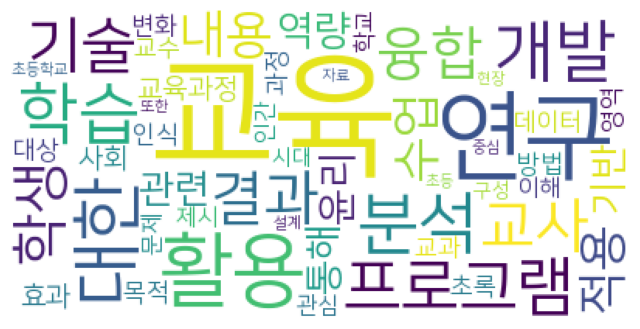

In [ ]:
wc = WordCloud (max_words=100,
           background_color='white',
           font_path= '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'
           )
wc.generate_from_frequencies(top_nouns)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.savefig('wordcloud.png') #그림을 저장
plt.show()